In [1]:
%cd ..

/home/jovyan/HyperDomainNet


In [2]:
import torch
import matplotlib.pyplot as plt

from core.utils.common import mixing_noise
from core.utils.image_utils import construct_paper_image_grid
from core.utils.example_utils import Inferencer

In [3]:
checkpoints = {
    'im2im': {
        'anastasia': 'checkpoints/im2im_checkpoints/im2im_anastasia.pt',
        'digital_painting_jing': 'checkpoints/im2im_checkpoints/im2im_digital_painting_jing.pt',
        'mermaid': 'checkpoints/im2im_checkpoints/im2im_mermaid.pt',
        'sketch': 'checkpoints/im2im_checkpoints/im2im_sketch.pt',
        'speed_paint': 'checkpoints/im2im_checkpoints/im2im_speed_paint.pt',
        'titan_armin': 'checkpoints/im2im_checkpoints/im2im_titan_armin.pt',
        'titan_erwin': 'checkpoints/im2im_checkpoints/im2im_titan_erwin.pt',
    },
    'td': {
        'anime': 'checkpoints/td_checkpoints/td_anime.pt',
        'monalisa': 'checkpoints/td_checkpoints/td_monalisa.pt',
        'pixar': 'checkpoints/td_checkpoints/td_pixar.pt',
        'sketch': 'checkpoints/td_checkpoints/td_sketch.pt',
        'ukiyo-e': 'checkpoints/td_checkpoints/td_ukiyo-e.pt',
        'botero': 'checkpoints/td_checkpoints/td_botero.pt',
        'werewolf': 'checkpoints/td_checkpoints/td_werewolf.pt',
        'zombie': 'checkpoints/td_checkpoints/td_joker.pt',
        'joker': 'checkpoints/td_checkpoints/td_neanderthal.pt',
        'mapper_20': 'checkpoints/mapper_20_td.pt',
        'mapper_large': 'checkpoints/mapper_large_resample_td.pt'
    }
}

In [4]:
device = 'cuda:0'

z = mixing_noise(
    16, 512, 0, device
)

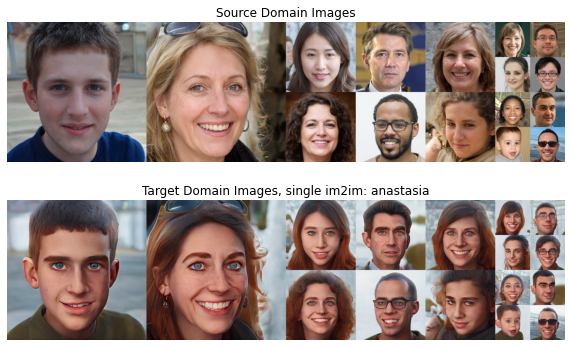

In [5]:
da_type = 'im2im'
target_domain = 'anastasia'

ckpt_path = checkpoints[da_type][target_domain]
ckpt = torch.load(ckpt_path, map_location='cpu')

model = Inferencer(ckpt, device)


src_im, trg_im = model(z, truncation=0.7)
src_im = construct_paper_image_grid(src_im)
trg_im = construct_paper_image_grid(trg_im)

fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].axis('off')
ax[0].imshow(src_im)
ax[0].set_title('Source Domain Images')
ax[1].axis('off')
ax[1].imshow(trg_im)
ax[1].set_title(f'Target Domain Images, single {da_type}: {target_domain}')


plt.show()

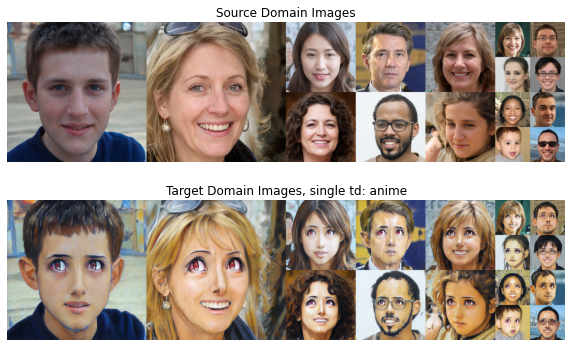

In [6]:
da_type = 'td'
target_domain = 'anime'

ckpt_path = checkpoints[da_type][target_domain]
ckpt = torch.load(ckpt_path, map_location='cpu')

model = Inferencer(ckpt, device)

src_im, trg_im = model(z, truncation=0.7)

src_im = construct_paper_image_grid(src_im)
trg_im = construct_paper_image_grid(trg_im)

fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].axis('off')
ax[0].imshow(src_im)
ax[0].set_title('Source Domain Images')
ax[1].axis('off')
ax[1].imshow(trg_im)
ax[1].set_title(f'Target Domain Images, single {da_type}: {target_domain}')

plt.show()

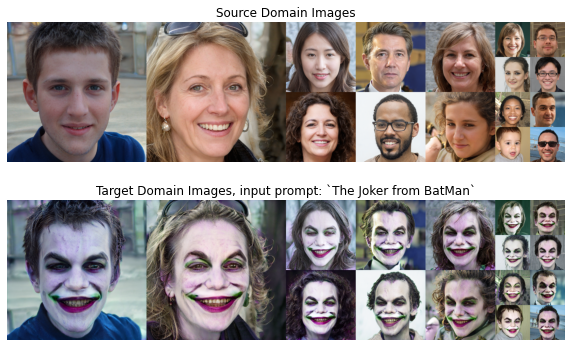

In [8]:
da_type = 'td'
target_domain = 'mapper_20'

ckpt_path = checkpoints[da_type][target_domain]
ckpt = torch.load(ckpt_path, map_location='cpu')

model = Inferencer(ckpt, device)


td_prompt='The Joker from BatMan'

src_im, trg_im = model(z, text_description=td_prompt, truncation=0.7)

src_im = construct_paper_image_grid(src_im)
trg_im = construct_paper_image_grid(trg_im)

fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].axis('off')
ax[0].imshow(src_im)
ax[0].set_title('Source Domain Images')
ax[1].axis('off')
ax[1].imshow(trg_im)
ax[1].set_title(f'Target Domain Images, input prompt: `{td_prompt}`')

plt.show()

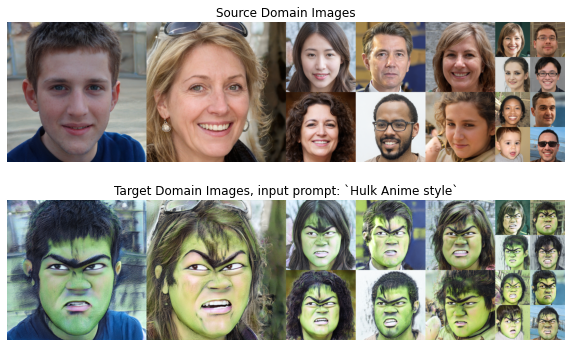

In [9]:
da_type = 'td'
target_domain = 'mapper_large'

ckpt_path = checkpoints[da_type][target_domain]
ckpt = torch.load(ckpt_path, map_location='cpu')

model = Inferencer(ckpt, device)


td_prompt = 'Hulk Anime style'

src_im, trg_im = model(z, text_description=td_prompt, truncation=0.7)

src_im = construct_paper_image_grid(src_im)
trg_im = construct_paper_image_grid(trg_im)

fig, ax = plt.subplots(2, 1, figsize=(10, 6))
ax[0].axis('off')
ax[0].imshow(src_im)
ax[0].set_title('Source Domain Images')
ax[1].axis('off')
ax[1].imshow(trg_im)
ax[1].set_title(f'Target Domain Images, input prompt: `{td_prompt}`')

plt.show()